In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Załadowanie danych z plików CSV
X_data = pd.read_csv('War4_X.csv', sep=';', header=None)
Xprime_data = pd.read_csv('War4_Xprime.csv', sep=';', header=None)

# Konwersja przecinków na kropki i konwersja do float
X_data = X_data.replace(',', '.', regex=True)
Xprime_data = Xprime_data.replace(',', '.', regex=True)

# Konwersja do numpy arrays numerycznych i transpozycja
X = X_data.astype(float).values.T
Xprime = Xprime_data.astype(float).values.T

print("Wymiary macierzy X:", X.shape)
print("Wymiary macierzy X':", Xprime.shape)
print("Typ danych X:", X.dtype)
print("Zakres wartości X: min =", np.min(X), ", max =", np.max(X))

Wymiary macierzy X: (36, 23)
Wymiary macierzy X': (36, 23)
Typ danych X: float64
Zakres wartości X: min = 1.0 , max = 1.09531e+38


In [11]:
def DMD(X, Xprime, r):
    """
    Dynamic Mode Decomposition
    X: macierz stanów w czasie t
    Xprime: macierz stanów w czasie t+1
    r: rząd aproksymacji
    """
    # Krok 1: SVD macierzy X
    U, Sigma, VT = np.linalg.svd(X, full_matrices=0)
    Ur = U[:, :r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r, :]
    
    # Krok 2: Obliczenie przybliżonej macierzy A w przestrzeni zredukowanej
    Atilde = np.linalg.solve(Sigmar.T, (Ur.T @ Xprime @ VTr.T).T).T
    
    # Krok 3: Wartości własne i wektory własne Atilde
    Lambda, W = np.linalg.eig(Atilde)
    Lambda = np.diag(Lambda)
    
    # Krok 4: Obliczenie modów DMD
    Phi = Xprime @ np.linalg.solve(Sigmar.T, VTr).T @ W
    
    # Warunki początkowe
    alpha1 = Sigmar @ VTr[:, 0]
    b = np.linalg.solve(W @ Lambda, alpha1)
    
    return Phi, Lambda, b, Atilde

In [12]:
# Zastosowanie DMD do danych
r = 10  # rząd aproksymacji (można eksperymentować)

# Wykonanie DMD
Phi, Lambda, b, Atilde = DMD(X, Xprime, r)

print("Przybliżona macierz A (Atilde) w przestrzeni zredukowanej:")
print("Wymiary Atilde:", Atilde.shape)
print("\nMacierz Atilde:")
print(Atilde)

print("\nWartości własne (Lambda):")
eigenvalues = np.diag(Lambda)
print("Liczba wartości własnych:", len(eigenvalues))
for i, val in enumerate(eigenvalues):
    print(f"λ_{i+1} = {val:.6f}")

Przybliżona macierz A (Atilde) w przestrzeni zredukowanej:
Wymiary Atilde: (10, 10)

Macierz Atilde:
[[ 1.86252433e+01 -4.50030470e+06 -1.12135574e+08  1.52039914e+09
   1.48106146e+09 -2.66024275e+10 -4.23453875e+12 -2.83871696e+13
  -3.50082868e+14  1.90449975e+15]
 [-2.29632101e-02  5.54835351e+03  1.38114291e+05 -1.87541497e+06
  -1.88703553e+06  3.29476847e+07  5.22320244e+09  3.50023672e+10
   4.32128767e+11 -2.34590223e+12]
 [-2.19675510e-03  5.31590761e+02  1.32775589e+04 -1.79582255e+05
  -1.68355397e+05  3.16194619e+06  4.99591350e+08  3.35033468e+09
   4.12308299e+10 -2.24735447e+11]
 [ 2.59987452e-04 -6.28291146e+01 -1.56389466e+03  2.12367726e+04
   2.07628612e+04 -3.69977418e+05 -5.91286313e+07 -3.96239132e+08
  -4.88595262e+09  2.65741955e+10]
 [-1.64967530e-05  3.98777109e+00  9.93023170e+01 -1.34361796e+03
  -1.33327415e+03  2.33466485e+04  3.74470830e+06  2.51276443e+07
   3.10257015e+08 -1.69010428e+09]
 [ 5.04679726e-06 -1.21910374e+00 -3.03644556e+01  4.11912320e+0

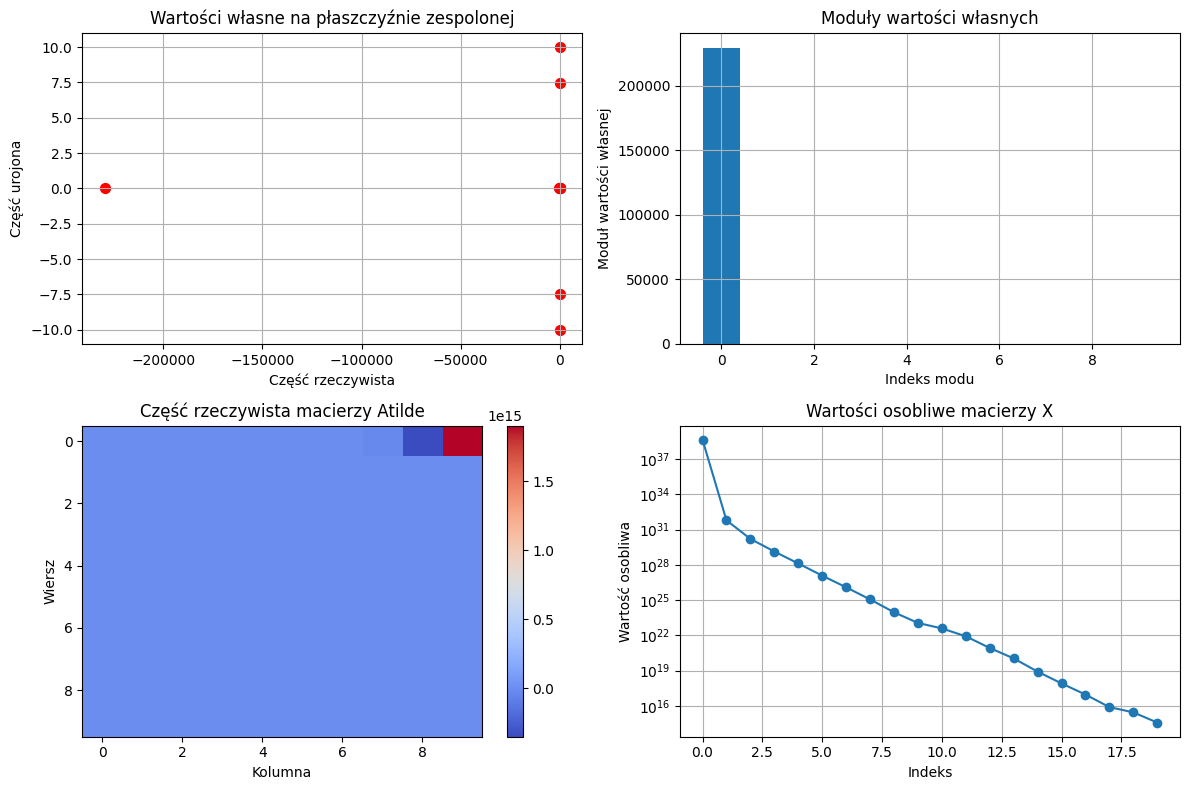

In [13]:
# Wizualizacja wyników
plt.figure(figsize=(12, 8))

# Wykres 1: Wartości własne na płaszczyźnie zespolonej
plt.subplot(2, 2, 1)
plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), c='red', s=50)
plt.xlabel('Część rzeczywista')
plt.ylabel('Część urojona')
plt.title('Wartości własne na płaszczyźnie zespolonej')
plt.grid(True)

# Wykres 2: Moduły wartości własnych
plt.subplot(2, 2, 2)
magnitudes = np.abs(eigenvalues)
plt.bar(range(len(magnitudes)), magnitudes)
plt.xlabel('Indeks modu')
plt.ylabel('Moduł wartości własnej')
plt.title('Moduły wartości własnych')
plt.grid(True)

# Wykres 3: Macierz Atilde (mapa ciepła)
plt.subplot(2, 2, 3)
plt.imshow(np.real(Atilde), cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Część rzeczywista macierzy Atilde')
plt.xlabel('Kolumna')
plt.ylabel('Wiersz')

# Wykres 4: Wartości osobliwe z SVD
plt.subplot(2, 2, 4)
U, S, VT = np.linalg.svd(X, full_matrices=0)
plt.semilogy(S[:20], 'o-')  # pierwsze 20 wartości
plt.xlabel('Indeks')
plt.ylabel('Wartość osobliwa')
plt.title('Wartości osobliwe macierzy X')
plt.grid(True)

plt.tight_layout()
plt.show()